# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [79]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/priyasatheesh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [80]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [81]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [82]:
# Fetch the Bitcoin news articles
BC_Articles = newsapi.get_everything(q="Bitcoin", language="en")

In [83]:
# Fetch the Ethereum news articles
ET_Articles = newsapi.get_everything(q="Ethereum", language="en")

In [84]:
# Create the Bitcoin sentiment scores DataFrame
BC_sentiments = []

for article in BC_Articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BC_sentiments.append({
            "text_BC": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
BC_df = pd.DataFrame(BC_sentiments)
cols = ["text_BC","date", "compound", "positive", "negative", "neutral"]
BC_df = BC_df[cols]
BC_df.head()

,text_BC,date,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,2022-02-09,0.5859,0.124,0.000,0.876
1,When Denis Rusinovich set up cryptocurrency mi...,2022-01-12,0.0000,0.000,0.000,1.000
2,El Salvador introduced Bitcoin as a legal tend...,2022-01-25,0.3182,0.105,0.000,0.895
3,Were officially building an open Bitcoin minin...,2022-01-14,-0.4404,0.000,0.083,0.917
4,Israeli national Tal Prihar pled guilty to rou...,2022-01-27,-0.3182,0.045,0.084,0.871


In [85]:
# Create the Ethereum sentiment scores DataFrame
ET_sentiments = []

for article in ET_Articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ET_sentiments.append({
            "text_ET": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
ET_df = pd.DataFrame(ET_sentiments)
cols = ["text_ET","date", "compound", "positive", "negative", "neutral"]
ET_df = ET_df[cols]
ET_df.head()

,text_ET,date,compound,positive,negative,neutral
0,"In a new blog post the company said that 4,836...",2022-01-20,0.0000,0.000,0.000,1.000
1,Hackers who made off with roughly $15 million ...,2022-01-19,0.0000,0.000,0.000,1.000
2,"On some level, the new mayor is simply employi...",2022-01-20,0.1779,0.052,0.000,0.948
3,"Back in September\r\n, Robinhood announced pla...",2022-01-21,0.0772,0.038,0.000,0.962
4,If people who buy cryptocurrencies intended on...,2022-02-10,-0.2023,0.039,0.062,0.899


In [86]:
# Describe the Bitcoin Sentiment
BC_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.053230,0.058350,0.038800,0.902850
std,0.438868,0.060941,0.051888,0.058408
min,-0.709600,0.000000,0.000000,0.765000
25%,-0.426225,0.000000,0.000000,0.874750
50%,0.127550,0.048500,0.000000,0.912000
75%,0.366350,0.109750,0.085000,0.934000
max,0.680800,0.185000,0.169000,1.000000


In [87]:
# Describe the Ethereum Sentiment
ET_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.133000,0.064100,0.022100,0.913800
std,0.331538,0.064006,0.045603,0.078963
min,-0.680800,0.000000,0.000000,0.775000
25%,0.000000,0.000000,0.000000,0.875500
50%,0.038600,0.048500,0.000000,0.913000
75%,0.406800,0.106000,0.011750,1.000000
max,0.757900,0.217000,0.174000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean score at 0.0641.

Q: Which coin had the highest compound score?

A: The highest compound score is for Ethereum articles at 0.7579 as compared to bitcoin at 0.6808

Q. Which coin had the highest positive score?

A: The highest compound score is for Ethereum articles at 0.2170 as compared to bitcoin at 0.1850

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [88]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [89]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


In [90]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    re_clean = re_clean.translate(str.maketrans('','',punctuation))
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]   
    # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [91]:
# Create a new tokens column for Bitcoin
token_list_BC = []
for index, row in BC_df.iterrows():
    token_BC = tokenizer(row.text_BC)
    token_list_BC.append(token_BC)
print(token_list_BC)

[['even', 'arent', 'paying', 'attention', 'bitcoin', 'cryptocurrencies', 'might', 'noticed', 'value', 'plummeted', 'last', 'week', 'total', 'value', 'market', 'tumbling', 'high', 'tr', 'char'], ['denis', 'rusinovich', 'set', 'cryptocurrency', 'mining', 'company', 'maveric', 'group', 'kazakhstan', 'thought', 'hit', 'jackpot', 'next', 'door', 'china', 'russia', 'country', 'everything', 'bitcoin', 'char'], ['el', 'salvador', 'introduced', 'bitcoin', 'legal', 'tender', 'alongside', 'us', 'dollar', 'illustration', 'alex', 'castro', 'verge', 'international', 'monetary', 'funds', 'executive', 'board', 'ha', 'recommended', 'el', 'char'], ['officially', 'building', 'open', 'bitcoin', 'mining', 'systemphoto', 'joe', 'raedlegetty', 'imagesblock', 'payment', 'company', 'formerly', 'known', 'square', 'working', 'building', 'open', 'bitcoin', 'mining', 'system', 'char'], ['israeli', 'national', 'tal', 'prihar', 'pled', 'guilty', 'routing', 'money', 'kickback', 'bitcoin', 'shell', 'company', 'illustr

In [92]:
# Create a new tokens column for Ethereum
token_list_ET = []
for index, row in ET_df.iterrows():
    token_ET = tokenizer(row.text_ET)
    token_list_ET.append(token_ET)
print(token_list_ET)

[['new', 'blog', 'post', 'company', 'said', 'eth', 'bitcoin', 'takenillustration', 'alex', 'castro', 'vergein', 'blog', 'post', 'published', 'early', 'hour', 'thursday', 'morning', 'cryptocurrency', 'char'], ['hackers', 'made', 'roughly', 'million', 'ethereum', 'cryptocom', 'attempting', 'launder', 'fund', 'socalled', 'ethereum', 'mixer', 'known', 'tornado', 'cash', 'according', 'new', 'report', 'char'], ['level', 'new', 'mayor', 'simply', 'employing', 'ageold', 'political', 'strategy', 'making', 'overture', 'business', 'community', 'fintech', 'growing', 'field', 'new', 'york', 'city', 'blockchainbased', 'company', 'char'], ['back', 'september', 'robinhood', 'announced', 'plan', 'test', 'cryptocurrency', 'wallet', 'within', 'app', 'time', 'company', 'said', 'would', 'open', 'beta', 'small', 'number', 'people', 'expanding', 'availa', 'char'], ['people', 'buy', 'cryptocurrencies', 'intended', 'hold', 'speculative', 'investment', 'thered', 'real', 'need', 'crypto', 'wallet', 'exchanges', 

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [93]:
from collections import Counter
from nltk import ngrams


In [94]:
# Generate the Bitcoin N-grams where N=2

BC_text = ' '.join(BC_df['text_BC'])
token_BC = tokenizer(BC_text)
bigram_counts_BC = Counter(ngrams(token_BC, n=2))
print(dict(bigram_counts_BC))

{('even', 'arent'): 1, ('arent', 'paying'): 1, ('paying', 'attention'): 1, ('attention', 'bitcoin'): 1, ('bitcoin', 'cryptocurrencies'): 1, ('cryptocurrencies', 'might'): 1, ('might', 'noticed'): 1, ('noticed', 'value'): 1, ('value', 'plummeted'): 1, ('plummeted', 'last'): 1, ('last', 'week'): 1, ('week', 'total'): 1, ('total', 'value'): 1, ('value', 'market'): 1, ('market', 'tumbling'): 1, ('tumbling', 'high'): 1, ('high', 'tr'): 1, ('tr', 'char'): 1, ('char', 'denis'): 1, ('denis', 'rusinovich'): 1, ('rusinovich', 'set'): 1, ('set', 'cryptocurrency'): 1, ('cryptocurrency', 'mining'): 1, ('mining', 'company'): 1, ('company', 'maveric'): 1, ('maveric', 'group'): 1, ('group', 'kazakhstan'): 1, ('kazakhstan', 'thought'): 1, ('thought', 'hit'): 1, ('hit', 'jackpot'): 1, ('jackpot', 'next'): 1, ('next', 'door'): 1, ('door', 'china'): 1, ('china', 'russia'): 1, ('russia', 'country'): 1, ('country', 'everything'): 1, ('everything', 'bitcoin'): 1, ('bitcoin', 'char'): 2, ('char', 'el'): 1, ('

In [95]:
# Generate the Ethereum N-grams where N=2
ET_text = ' '.join(ET_df['text_ET'])
token_ET = tokenizer(ET_text)
bigram_counts_ET = Counter(ngrams(token_ET, n=2))
print(dict(bigram_counts_ET))

{('new', 'blog'): 2, ('blog', 'post'): 3, ('post', 'company'): 2, ('company', 'said'): 2, ('said', 'eth'): 1, ('eth', 'bitcoin'): 1, ('bitcoin', 'takenillustration'): 1, ('takenillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergein'): 1, ('vergein', 'blog'): 1, ('post', 'published'): 1, ('published', 'early'): 1, ('early', 'hour'): 1, ('hour', 'thursday'): 1, ('thursday', 'morning'): 1, ('morning', 'cryptocurrency'): 1, ('cryptocurrency', 'char'): 1, ('char', 'hackers'): 1, ('hackers', 'made'): 1, ('made', 'roughly'): 1, ('roughly', 'million'): 1, ('million', 'ethereum'): 1, ('ethereum', 'cryptocom'): 1, ('cryptocom', 'attempting'): 1, ('attempting', 'launder'): 1, ('launder', 'fund'): 1, ('fund', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'mixer'): 1, ('mixer', 'known'): 1, ('known', 'tornado'): 1, ('tornado', 'cash'): 1, ('cash', 'according'): 1, ('according', 'new'): 2, ('new', 'report'): 1, ('report', 'char'): 1, ('char', 'level'): 1, ('level', 'new'):

In [96]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [97]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bigram_counts_BC, N=10)

[(('bitcoin', 'mining'), 4),
 (('el', 'salvador'), 3),
 (('alex', 'castro'), 3),
 (('building', 'open'), 3),
 (('open', 'bitcoin'), 3),
 (('mining', 'system'), 3),
 (('bitcoin', 'char'), 2),
 (('alongside', 'us'), 2),
 (('illustration', 'alex'), 2),
 (('international', 'monetary'), 2)]

In [98]:
# Use token_count to get the top 10 words for Ethereum
token_count(bigram_counts_ET, N=10)

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('char', 'crypto'), 2),
 (('char', 'feb'), 2),
 (('feb', 'reuters'), 2),
 (('char', 'believers'), 2),
 (('believers', 'open'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

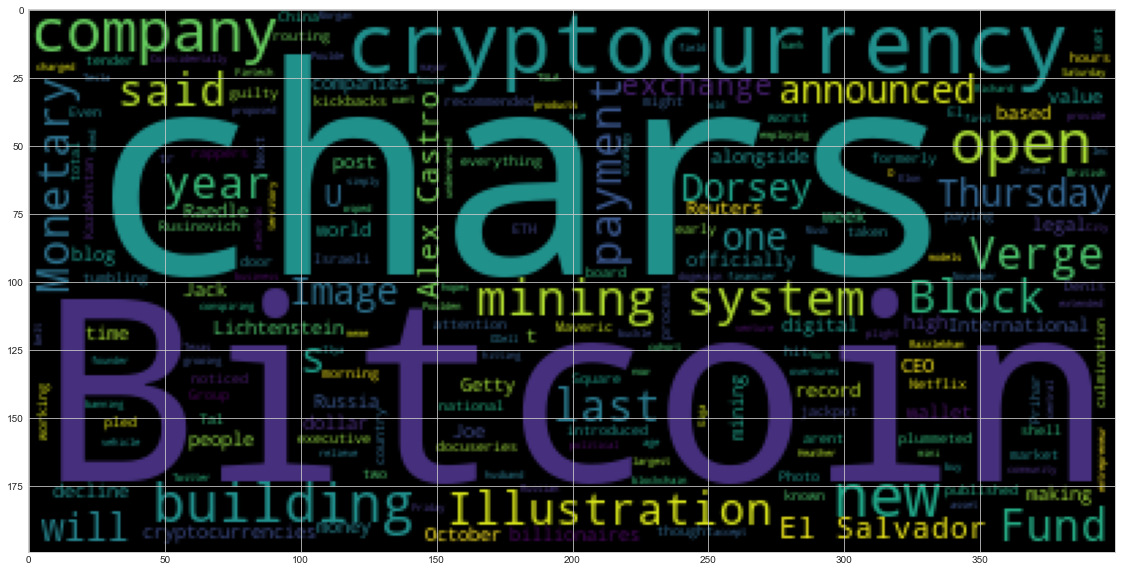

In [118]:
# Generate the Bitcoin word cloud
big_string_BC = ' '.join(BC_df['text_BC'])
wc = WordCloud().generate(big_string_BC)
plt.imshow(wc)
wc.to_file('BC.png')

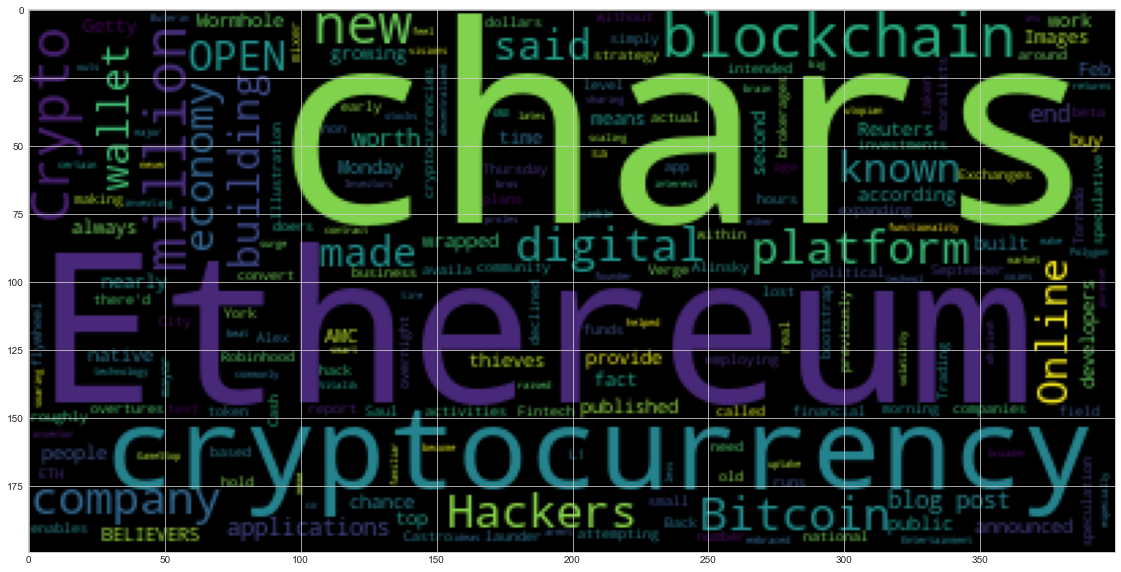

In [119]:
# Generate the Ethereum word cloud
big_string_ET = ' '.join(ET_df['text_ET'])
wc = WordCloud().generate(big_string_ET)
plt.imshow(wc)
wc.to_file('ET.png')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [102]:
import spacy
from spacy import displacy

In [103]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [104]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [107]:
# Concatenate all of the Bitcoin text together
big_string_BC = ' '.join(BC_df['text_BC'])

In [108]:
# Run the NER processor on all of the text
doc_BC = nlp(big_string_BC)

# Add a title to the document
doc_BC.user_data["title"] = "Bitcoin News - NER Visualization"


In [111]:
# Render the visualization
displacy.render(doc_BC, style='ent')

In [112]:
# List all Entities
for ent in doc_BC.ents:
    print(ent.text, ent.label_)

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The 

---

### Ethereum NER

In [113]:
# Concatenate all of the Ethereum text together
big_string_ET = ' '.join(ET_df['text_ET'])

In [114]:
# Run the NER processor on all of the text
doc_ET = nlp(big_string_ET)

# Add a title to the document
doc_ET.user_data["title"] = "Ethereum News - NER Visualization"

In [115]:
# Render the visualization
displacy.render(doc_ET, style='ent')

In [116]:
# List all Entities
for ent in doc_ET.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Saul Alinsky Ethereum ORG
Ethereum ORG
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Feb 4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 

---